## Prediction on Car Collision Severity in Seattle 

In [1]:
# import library 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

### Table of Content
* [Data Preparation](#data-preparation)
* [Exploratory Data Analysis](#EDA)
* [Balance Scale Dataset](#bal_dataset)
* [Methodology](#methodology)
* [Result](#result)





### Data Preparation <a class="anchor" id="data-preparation"></a>

In [2]:
#read dataset
collisions = pd.read_csv("Data-Collisions.csv")
collisions.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [47]:
#check missing values
sumNullRws = collisions.isnull().sum()
sumNullRws

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [3]:
#select related variable for analysis 
collisions2 = collisions[["ADDRTYPE","LOCATION","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND","SEVERITYCODE"]]
collisions2.head()

,ADDRTYPE,LOCATION,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,Intersection,5TH AVE NE AND NE 103RD ST,At Intersection (intersection related),Overcast,Wet,Daylight,2
1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,1
2,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Mid-Block (not related to intersection),Overcast,Dry,Daylight,1
3,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Mid-Block (not related to intersection),Clear,Dry,Daylight,1
4,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,At Intersection (intersection related),Raining,Wet,Daylight,2


In [4]:
#drop missing values
collisions3 = collisions2.dropna()
collisions3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182679 entries, 0 to 194672
Data columns (total 7 columns):
ADDRTYPE        182679 non-null object
LOCATION        182679 non-null object
JUNCTIONTYPE    182679 non-null object
WEATHER         182679 non-null object
ROADCOND        182679 non-null object
LIGHTCOND       182679 non-null object
SEVERITYCODE    182679 non-null int64
dtypes: int64(1), object(6)
memory usage: 11.1+ MB


### Exploratory Data Analysis  <a class="anchor" id="EDA"></a>
SerityCode: 1= Property Damage Only Collision; 2=Injury Collision

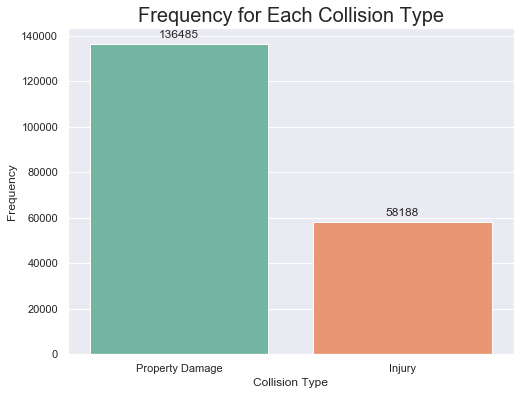

In [215]:
#Frequency for each collision type
plt.figure(figsize=(8, 6))
ax=sns.countplot('SEVERITYCODE', data=collisions, palette="Set2")

for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_title('Frequency for Each Collision Type', fontsize=20)
ax.set_xticklabels(['Property Damage', 'Injury'])
ax.set_ylabel("Frequency")
ax.set_xlabel("Collision Type")
plt.show()


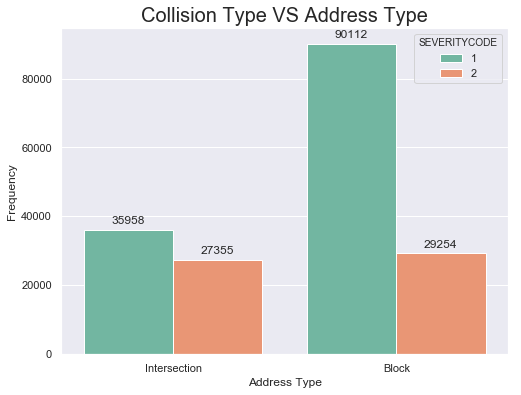

In [376]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = collisions3['ADDRTYPE'], hue=collisions3['SEVERITYCODE'], data = collisions3, palette="Set2") 
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_title('Collision Type VS Address Type', fontsize=20)
ax.set_ylabel('Frequency')
ax.set_xlabel("Address Type")
plt.show()

In [203]:
collision_junc = collisions3.groupby(["JUNCTIONTYPE","SEVERITYCODE"]).size().reset_index(name="Frequency")
collision_junc = pd.DataFrame(collision_junc)
collision_junc

,JUNCTIONTYPE,SEVERITYCODE,Frequency
0,At Intersection (but not related to intersection),1,1438
1,At Intersection (but not related to intersection),2,616
2,At Intersection (intersection related),1,34492
3,At Intersection (intersection related),2,26729
4,Driveway Junction,1,7275
5,Driveway Junction,2,3185
6,Mid-Block (but intersection related),1,15153
7,Mid-Block (but intersection related),2,7188
8,Mid-Block (not related to intersection),1,67598
9,Mid-Block (not related to intersection),2,18840


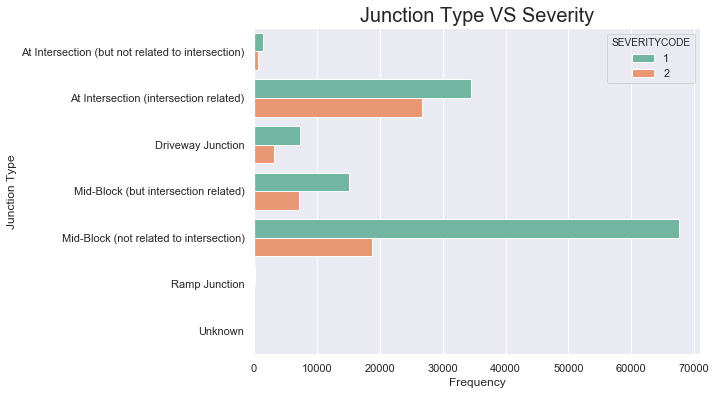

In [238]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x= "Frequency", y="JUNCTIONTYPE",hue="SEVERITYCODE",data=collision_junc, palette="Set2")
ax.set_title('Junction Type VS Severity', fontsize=20)
ax.set_ylabel('Junction Type')
ax.set_xlabel("Frequency")
plt.show()

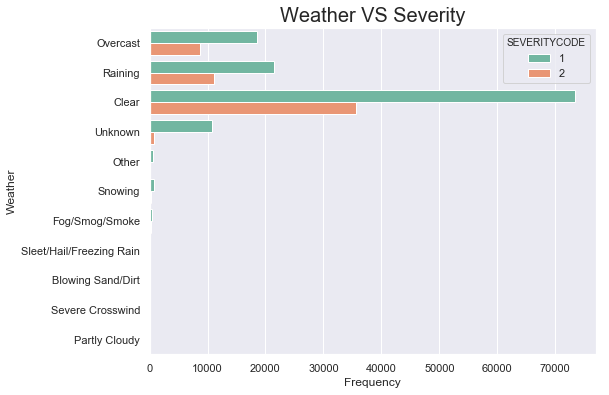

In [248]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(y='WEATHER',hue="SEVERITYCODE", data=collisions3, palette="Set2")
ax.set_title('Weather VS Severity', fontsize=20)
ax.set_ylabel('Weather')
ax.set_xlabel("Frequency")
plt.show()

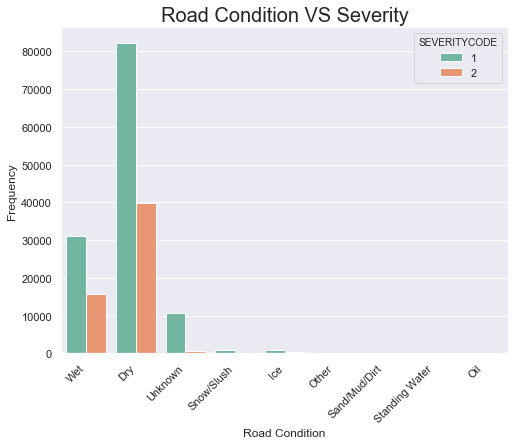

In [249]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='ROADCOND', hue="SEVERITYCODE",data=collisions3, palette="Set2")
ax.set_title('Road Condition VS Severity', fontsize=20)
ax.set_xlabel('Road Condition')
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

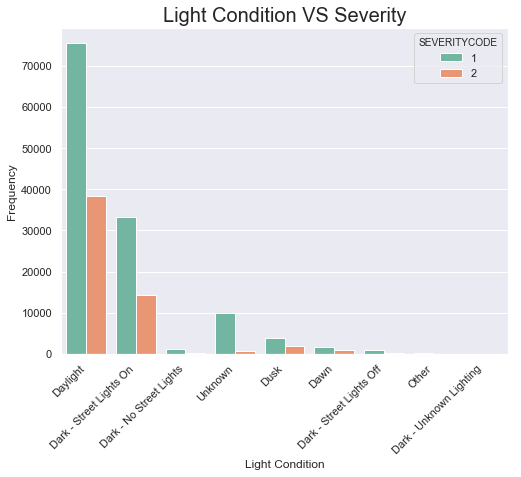

In [250]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='LIGHTCOND', hue="SEVERITYCODE",data=collisions3, palette="Set2")
ax.set_title('Light Condition VS Severity', fontsize=20)
ax.set_xlabel('Light Condition')
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Balance Scale Dataset <a class="anchor" id="bal_dataset"></a>

In [5]:
#fix the imbalance dataset using oversampling method
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Separate input features and target
y = collisions3.SEVERITYCODE
X = collisions3.drop('SEVERITYCODE', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
property_damage = X[X.SEVERITYCODE==1]
injury = X[X.SEVERITYCODE==2]

# upsample minority
property_damage_upsampled = resample(property_damage,
                          replace=True, # sample with replacement
                          n_samples=len(injury), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([injury, property_damage_upsampled])

# check new class counts
upsampled.SEVERITYCODE.value_counts()

print("length of oversampled data is ",len(upsampled))
print("Number of property damage only collision in unsampled data is",len(upsampled[upsampled['SEVERITYCODE']==1]))
print("Number of injury collision is",len(upsampled[upsampled['SEVERITYCODE']==2]))

length of oversampled data is  85056
Number of property damage only collision in unsampled data is 42528
Number of injury collision is 42528


In [6]:
collisions_bm = upsampled

### Methodology <a class="anchor" id="methodology"></a>

In [7]:
X=collisions_bm.drop(['SEVERITYCODE','LOCATION'],axis=1)
y=collisions_bm['SEVERITYCODE']

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [10]:
collisions_bm_encoded=MultiColumnLabelEncoder().fit_transform(collisions_bm.drop(['LOCATION'],axis=1))
collisions_bm_encoded.head()

,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
102163,0,4,1,0,5,1
122835,0,4,1,0,2,1
150937,1,1,6,8,2,1
110427,1,1,4,8,5,1
114240,0,4,1,0,5,1


In [11]:
#Splite the dataset 
X=collisions_bm_encoded.drop('SEVERITYCODE',axis=1)
y=collisions_bm_encoded['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Test Set', X_test.shape, y_test.shape)
print('Tranning Set', X_train.shape, y_train.shape)

Test Set (25517, 5) (25517,)
Tranning Set (59539, 5) (59539,)


In [12]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
#Accuracy
y_pred_logreg = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on the test set is: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on the test set is: 0.60


In [14]:
print(classification_report(y_pred_logreg,y_test))

              precision    recall  f1-score   support

           0       0.66      0.60      0.62     14240
           1       0.54      0.61      0.57     11277

   micro avg       0.60      0.60      0.60     25517
   macro avg       0.60      0.60      0.60     25517
weighted avg       0.61      0.60      0.60     25517



In [17]:
##Decision Tree 
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=7)
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
#Accuracy
y_pred_DT = DT.predict(X_test)
print('Accuracy of decision tree  classifier on the test set is: {:.2f}'.format(DT.score(X_test, y_test)))

Accuracy of decision tree  classifier on the test set is: 0.61


In [19]:
print(classification_report(y_pred_DT,y_test))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59     11912
           1       0.64      0.59      0.62     13605

   micro avg       0.61      0.61      0.61     25517
   macro avg       0.61      0.61      0.61     25517
weighted avg       0.61      0.61      0.61     25517



In [313]:
###KNN 
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

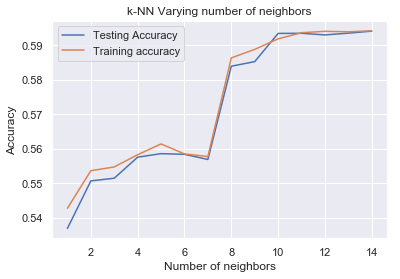

In [314]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [324]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=10)
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [326]:
#Accuracy
y_pred_knn = knn.predict(X_test)
print('Accuracy of decision tree  classifier on the test set is: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of decision tree  classifier on the test set is: 0.59


In [327]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.64      0.59      0.61     13882
           1       0.55      0.60      0.57     11635

   micro avg       0.59      0.59      0.59     25517
   macro avg       0.59      0.59      0.59     25517
weighted avg       0.60      0.59      0.59     25517



### Result<a class="anchor" id="result"></a>

Confusion matrix, without normalization
[[8077 4527]
 [5528 7385]]


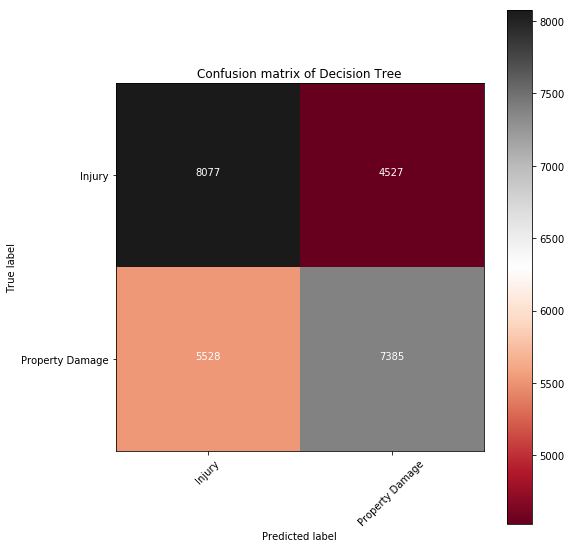

In [24]:
#decision tree has the highest accuracy score of 0.61
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdGy):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Plot it
cnf_matrix = confusion_matrix(y_test, y_pred_DT, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['Injury','Property Damage'],normalize= False,  title='Confusion matrix of Decision Tree')


Confusion matrix, without normalization
[[6841 5763]
 [4436 8477]]


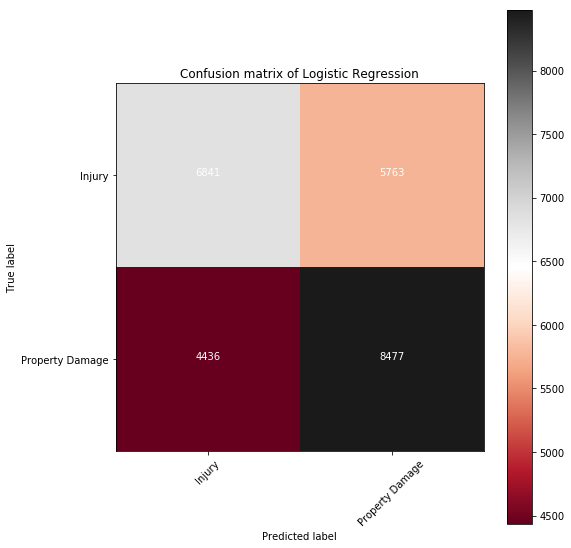

In [23]:
cnf_matrix2 = confusion_matrix(y_test, y_pred_logreg, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix2, classes=['Injury','Property Damage'],normalize= False,  title='Confusion matrix of Logistic Regression')


In [56]:
#Logistic Regression Model 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.666359
         Iterations 4
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.039      
Dependent Variable: SEVERITYCODE     AIC:              113365.6796
Date:               2020-10-22 14:06 BIC:              113412.4350
No. Observations:   85056            Log-Likelihood:   -56678.    
Df Model:           4                LL-Null:          -58956.    
Df Residuals:       85051            LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     4.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ADDRTYPE       0.7773    0.0178   43.5921  0.0000   0.7424   0.8123
JUNCTIONTYPE  -0.0304    0.0056   -5.4753  0.0000

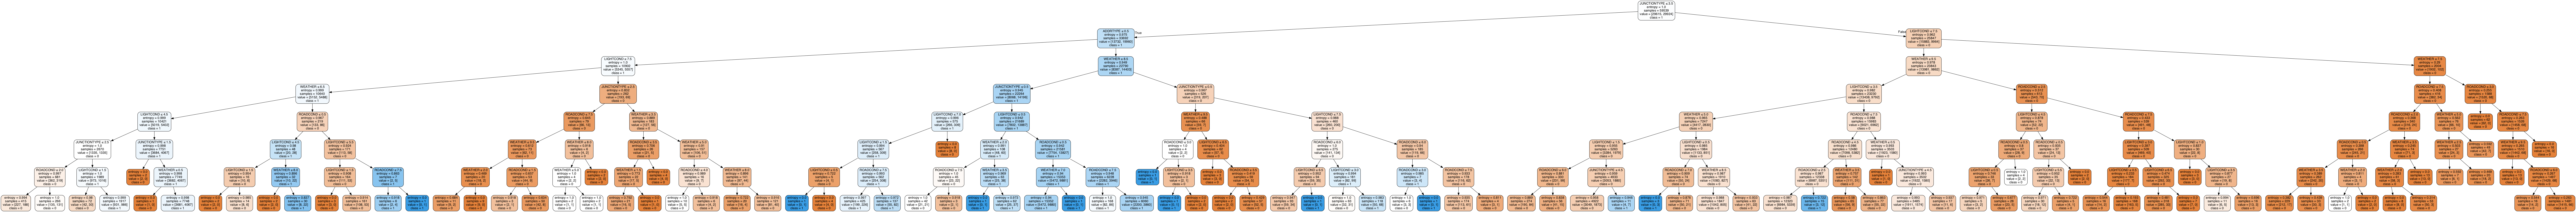

In [62]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = ['ADDRTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND','LIGHTCOND']

dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('collision.png')
Image(graph.create_png())


In [71]:
#maintian the same accuracy scoure and reduce the tree depth
DT2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

DT2 = DT2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_DT2 = DT2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT2))

Accuracy: 0.6032840851197241


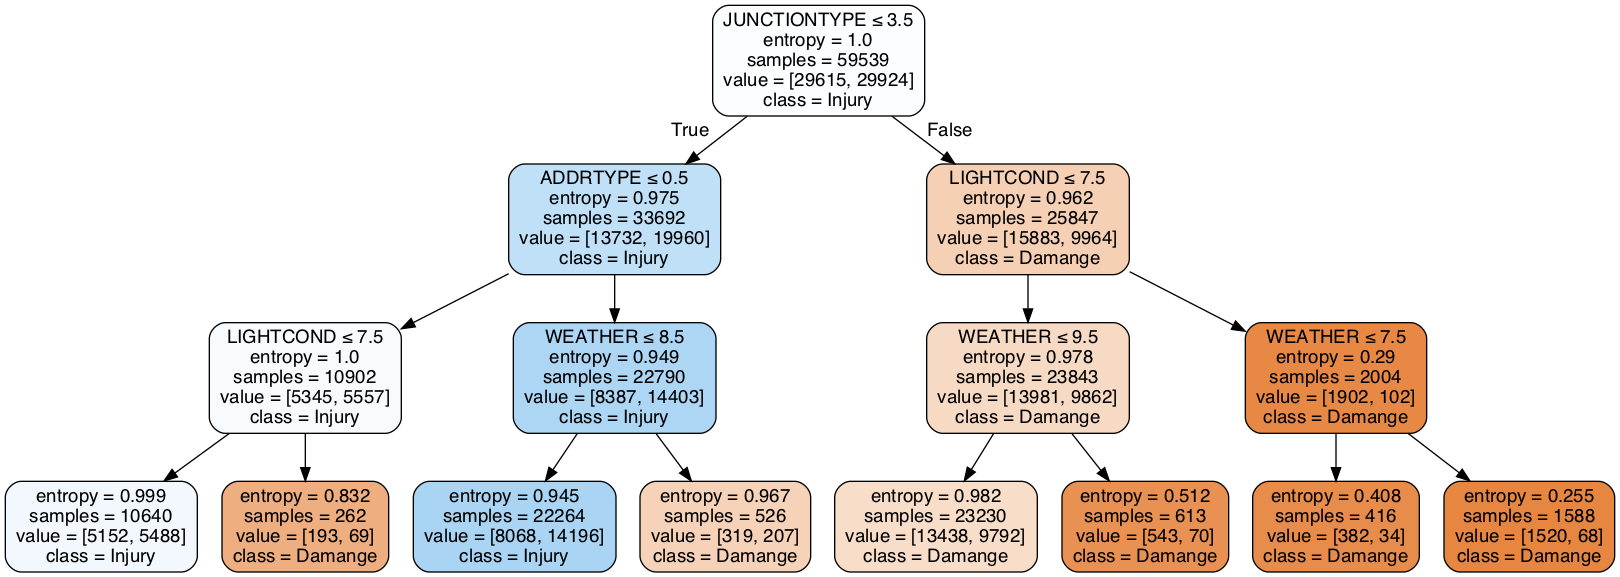

In [72]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(DT2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Damange','Injury'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('collision.png')
Image(graph.create_png())

In [82]:
#check label encoded for each variable's value
for col in collisions_bm_encoded:
    print(col,collisions_bm_encoded[col].unique())

ADDRTYPE [0 1]
JUNCTIONTYPE [4 1 3 2 0 5 6]
WEATHER [ 1  6  4  2 10  9  8  3  5  0  7]
ROADCOND [0 8 7 5 1 2 6 4 3]
LIGHTCOND [5 2 6 1 4 8 0 7 3]
SEVERITYCODE [1 0]


In [81]:
for col in collisions_bm:
    print(col, collisions_bm[col].unique())

ADDRTYPE ['Block' 'Intersection']
LOCATION ['SAND POINT WAY NE BETWEEN NE 74TH ST AND NE 75TH ST'
 'LAKE CITY WAY NE BETWEEN NE 140TH ST AND NE 143RD ST'
 'WESTLAKE AVE N AND VALLEY ST' ...
 '52ND PL SW BETWEEN SW GENESEE ST AND DEAD END'
 '65TH AVE NE BETWEEN NE WINDERMERE RD AND NE 60TH ST'
 '39TH AVE SW BETWEEN SW FOREST ST AND SW STEVENS N ST']
JUNCTIONTYPE ['Mid-Block (not related to intersection)'
 'At Intersection (intersection related)'
 'Mid-Block (but intersection related)' 'Driveway Junction'
 'At Intersection (but not related to intersection)' 'Ramp Junction'
 'Unknown']
WEATHER ['Clear' 'Raining' 'Overcast' 'Fog/Smog/Smoke' 'Unknown' 'Snowing'
 'Sleet/Hail/Freezing Rain' 'Other' 'Partly Cloudy' 'Blowing Sand/Dirt'
 'Severe Crosswind']
ROADCOND ['Dry' 'Wet' 'Unknown' 'Snow/Slush' 'Ice' 'Oil' 'Standing Water'
 'Sand/Mud/Dirt' 'Other']
LIGHTCOND ['Daylight' 'Dark - Street Lights On' 'Dusk' 'Dark - Street Lights Off'
 'Dawn' 'Unknown' 'Dark - No Street Lights' 'Other'
 'Dark -